The dataset was sourced form: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Data Inspection

In [89]:
df = pd.read_csv("../../backend/data/housing-dataset.csv")
df.head(50)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [90]:
df.shape

(545, 13)

In [91]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [92]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [93]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [94]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [95]:
# Encoding boolean values from string to int (1 for yes, 0 for no)
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({'yes': 1, 'no': 0}).astype(int)

In [96]:
# Encoding furnishing status from string to int (0 for unfurnished, 1 for semi-furnished, 2 for furnished)
df["furnishingstatus"].replace({"unfurnished": 0, "semi-furnished": 1, "furnished": 2}, inplace=True)

In [97]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [98]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

Feature Engineering:

In [99]:
# Feature: Total Number of Rooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Feature: Area per room
df['area_per_room'] = df['area'] / df['total_rooms']

# Feature: Number of Amenities
amenities = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
df['amenity_count'] = df[amenities].sum(axis=1)

In [106]:
from scipy import stats

# We will use z-score to find and remove outliers
z_scores = stats.zscore(df[['price', 'area']])
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 2.5).any(axis=1)
outlier_data = df[outliers]

print(f"Outliers based on Z-scores:\n{outlier_data}")
print("Number of Outliers:", len(df[outliers].index))


Outliers based on Z-scores:
        price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000   7420         4          2        3         1          0   
1    12250000   8960         4          4        4         1          0   
2    12250000   9960         3          2        2         1          0   
3    12215000   7500         4          2        2         1          0   
4    11410000   7420         4          1        2         1          1   
5    10850000   7500         3          3        1         1          0   
6    10150000   8580         4          3        4         1          0   
7    10150000  16200         5          3        2         1          0   
8     9870000   8100         4          1        2         1          1   
9     9800000   5750         3          2        4         1          1   
10    9800000  13200         3          1        2         1          0   
11    9681000   6000         4          3        2         1          1 

In [107]:
# We will drop the 13 outliers from the dataset
df= df.drop(df.index[outliers])

Checking Correlation between features

<Axes: >

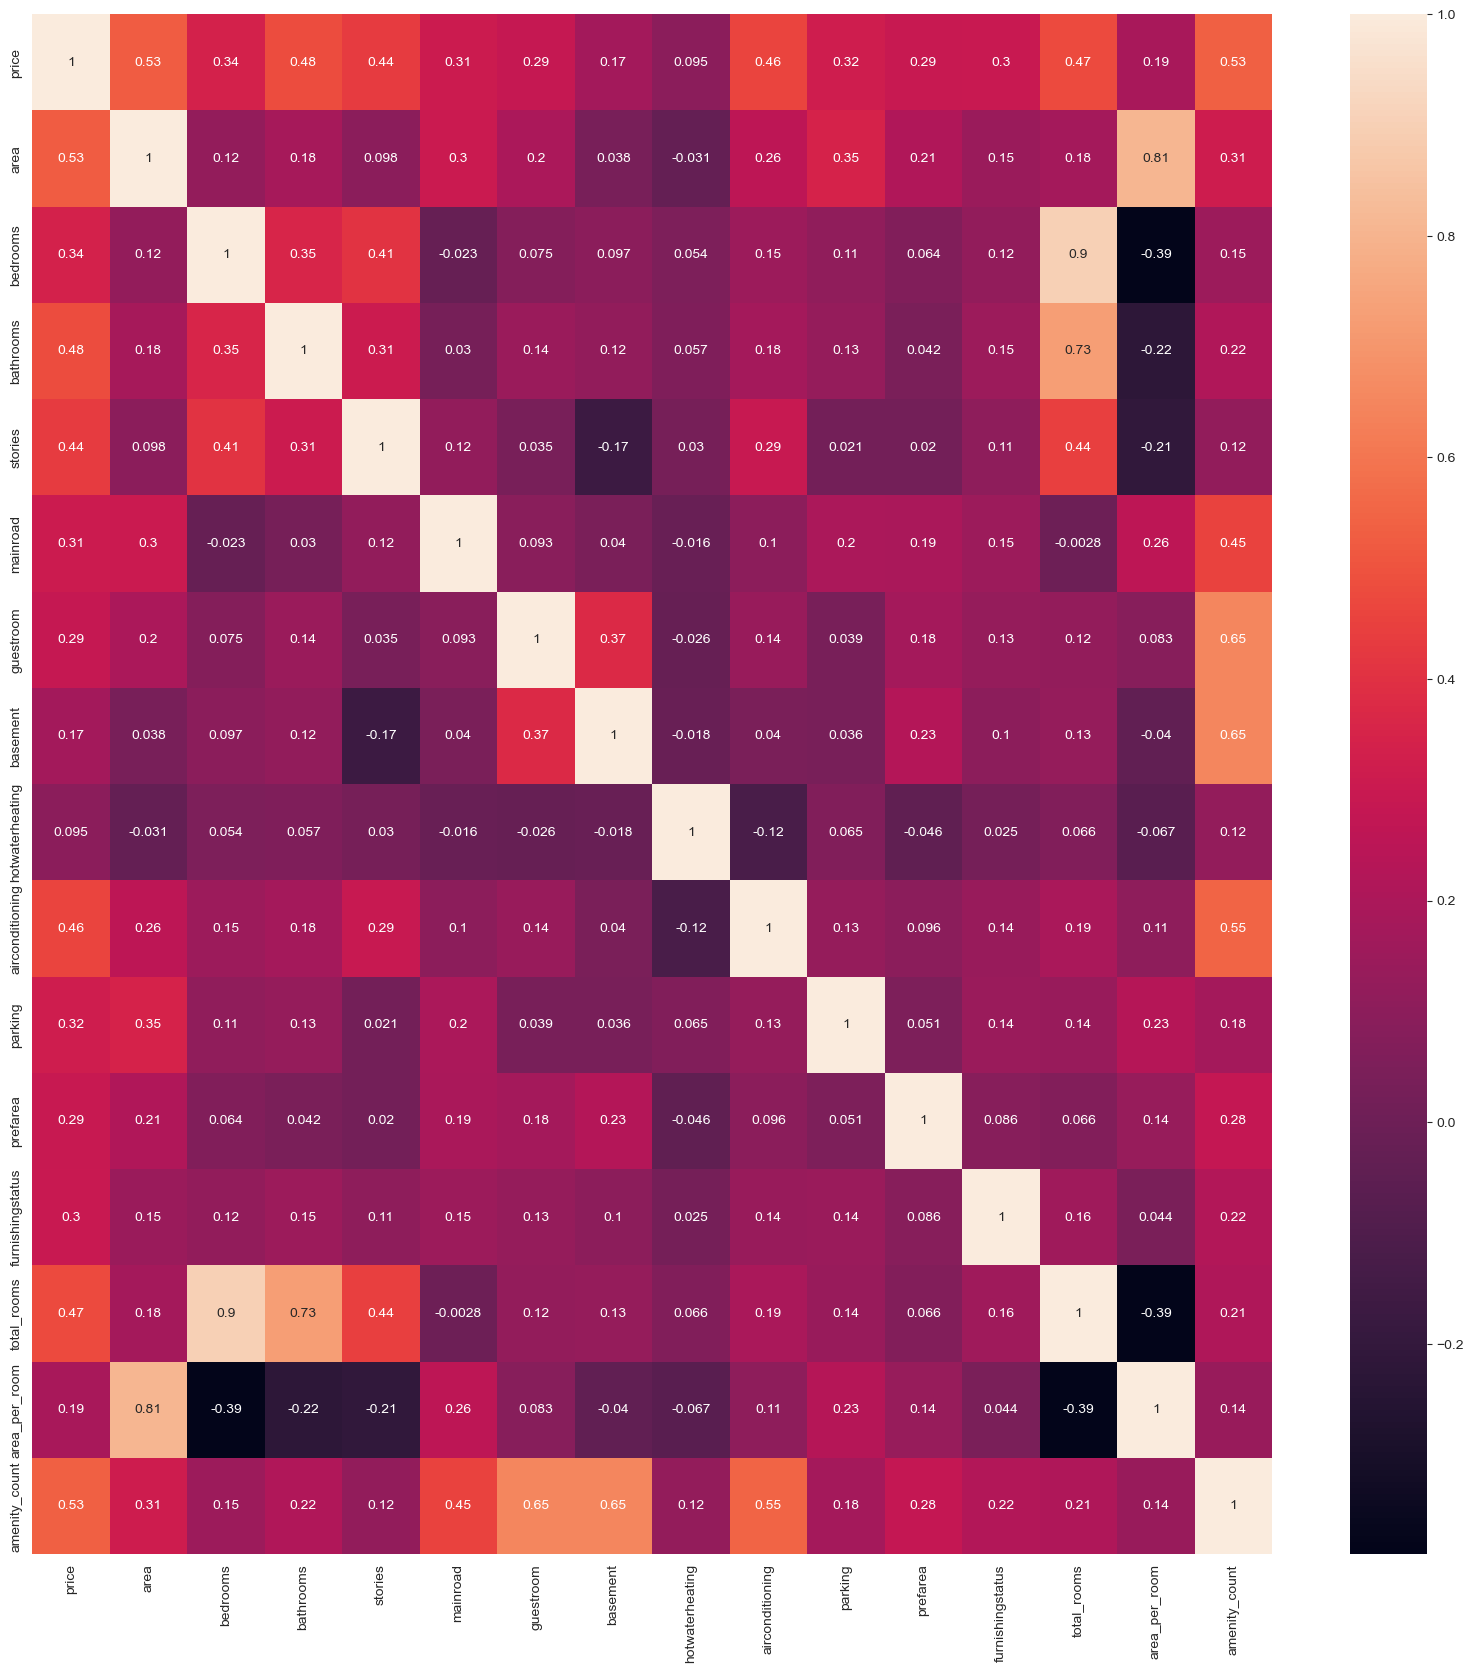

In [108]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

In [109]:
corr_target = abs(corr["price"])
correlated_features = corr_target[corr_target>0.2]

names = [index for index, value in correlated_features.items()]

names.remove("price")

print(names)

['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 'total_rooms', 'amenity_count']


## Preprocessing

In [119]:
# Saving dataset after changes
df.to_csv('../../backend/data/housing-dataset.csv', index=False)

# Creating training dataset
train_df = pd.read_csv('../../backend/data/housing-dataset.csv')
train_df.to_csv('../../backend/data/training-housing-dataset.csv')


In [120]:
train_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,area_per_room,amenity_count
0,9310000,6550,4,2,2,1,0,0,0,1,1,1,1,6,1091.666667,2
1,9240000,3500,4,2,2,1,0,0,1,0,2,0,2,6,583.333333,2
2,9240000,7800,3,2,2,1,0,0,0,0,0,1,1,5,1560.000000,1
3,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,5,1200.000000,2
4,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,6,1100.000000,4


In [121]:
# Scaling Data
scaled_columns = ["price", "area", "area_per_room"]
scaler = MinMaxScaler()
train_df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

In [122]:
# Saving scaling
train_df.to_csv('../../backend/data/training-housing-dataset.csv')

In [123]:
train_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,area_per_room,amenity_count
0,1.000000,0.553672,4,2,2,1,0,0,0,1,1,1,1,6,0.243257,2
1,0.990741,0.209040,4,2,2,1,0,0,1,0,2,0,2,6,0.083530,2
2,0.990741,0.694915,3,2,2,1,0,0,0,0,0,1,1,5,0.390416,1
3,0.972222,0.491525,4,1,2,1,0,1,0,0,2,0,1,5,0.277298,2
4,0.972222,0.559322,4,2,2,1,1,1,0,1,1,1,0,6,0.245876,4


In [124]:
# Creating training and testing datasets
X = train_df.drop(columns="price")
Y = train_df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [126]:
# Finding best alpha for model
from sklearn.linear_model import ElasticNetCV
Enet_cv = ElasticNetCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
Enet_cv.fit(X_train, Y_train)
print(f"Optimal alpha: {Enet_cv.alpha_}")

Optimal alpha: 0.01


In [129]:
# Training the model
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.01)
model.fit(X_train, Y_train)

ElasticNet(alpha=0.01)

In [131]:
# Making predictions with the model
Y_pred = model.predict(X_test)
# Evaluating model performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("mean squared error for dataset including outliers:", mse)
print("regression^2 for dataset including outliers", r2)

mean squared error for dataset including outliers: 0.02340184040435722
regression^2 for dataset including outliers 0.6268934142961161
